<a href="https://colab.research.google.com/github/mirrtl/deepl/blob/main/sv_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# библиотеки и теория по conv2d


In [7]:
!git config --global user.name 'mirttl'


In [8]:
!git config --global user.email 'alekseevp03@gmail.com'


In [9]:
!git clone https://github.com/mirrtl/deepl.git

fatal: destination path 'deepl' already exists and is not an empty directory.


In [12]:
!mv /content/sv_nn.ipynb /content/deepl/

mv: cannot stat '/content/sv_nn.ipynb': No such file or directory


In [4]:
import torch
import torchvision
from torchvision.datasets import ImageFolder
from torch.utils.data import  Dataset, DataLoader, random_split
from torchvision import transforms
from torchvision.transforms import v2
from torch import nn

import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from PIL import Image
from tqdm import tqdm
import struct
import sys

from array import array
from os import path

In [5]:
# nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias)

# 1) кол-во входных каналлов(для серого = 1, для цв. = 3)
# 2) кол-во вых  одных каналлов
# 3) размер ядра(можно указывать в виде кортежа)
# - кол-во ядер в сверточном фильтре равно кол-ву входных каналлов
# - кол-во сверточных фильтров равно кол-ву выходных каналлов
# 4) смещение окна ядра(движение), можно записать в виде кортежа
# - stride по умолчанию = 1
# 5) внешний отступ(padding) , можно записать в виде кортежа(a,b)
# a -сверху и снизу, b -справа и слева
# 6) bias, по умолчанию значение True

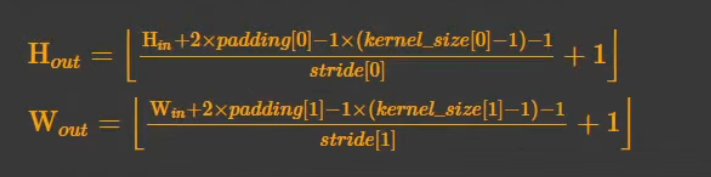

# Теория

In [ ]:
'''
input_size => (batch, c ,h ,w)
'''
model = nn.Sequential(
    nn.Conv2d(3, 32, (3,3)), #inp => (batch_size, 3 ,28, 28), out => (batch_size, 32, 26, 26)
    nn.ReLU(),
    nn.Conv2d(32, 64, (3,3)) #inp =>(batch_size, 32, 26, 26), out =>(batch_size, 64, 24, 24)
)
model

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
)

In [ ]:
input = torch.rand([16, 3, 28, 28], dtype = torch.float32)

out = model(input)
out.shape


NameError: name 'torch' is not defined

In [ ]:
model =nn.Sequential()
model.add_module('layer_1', nn.Conv2d(3, 32, (3,3)))
model.add_module('ReLU', nn.ReLU())
model.add_module('layer_2', nn.Conv2d(32,62, (3,3)))

In [ ]:
model

Sequential(
  (layer_1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (ReLU): ReLU()
  (layer_2): Conv2d(32, 62, kernel_size=(3, 3), stride=(1, 1))
)

In [ ]:
# model.state_dict()
model.state_dict()['layer_1.weight'].shape
model.state_dict()['layer_2.weight'].shape

torch.Size([62, 32, 3, 3])

In [ ]:
class MyModel(nn.Module):
  def __init__(self, in_channels, out_channels):
    super().__init__()
    self.conv_1 = nn.Conv2d(in_channels, 32, (3,3))
    self.act = nn.ReLU()
    self.conv_2 = nn.Conv2d(32, out_channels, (3,3))
  def forward(self, x):
    x = self.conv_1(x)
    x = self.act(x)
    out = self.conv_2(x)
    return out

model = MyModel(3, 64)
model

MyModel(
  (conv_1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (act): ReLU()
  (conv_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
)

In [ ]:
input = torch.rand([16, 3, 50, 50], dtype = torch.float32)

out = model(input)
out.shape

torch.Size([16, 64, 46, 46])

# Слой Flatten

In [ ]:
tensor = torch.rand([2, 1, 3, 3], dtype = torch.float32)
tensor

tensor([[[[0.0458, 0.3252, 0.9895],
          [0.9225, 0.4463, 0.0855],
          [0.5935, 0.5481, 0.5134]]],


        [[[0.2081, 0.4053, 0.3515],
          [0.0309, 0.0014, 0.7744],
          [0.4683, 0.6379, 0.3526]]]])

In [ ]:
conv = nn.Conv2d(1, 3, (3, 3))(tensor)

print(conv.shape)
print(conv)

torch.Size([2, 3, 1, 1])
tensor([[[[-0.2907]],

         [[-0.3191]],

         [[-0.1162]]],


        [[[-0.3437]],

         [[-0.1659]],

         [[-0.1515]]]], grad_fn=<ConvolutionBackward0>)


In [ ]:
tensor = tensor.reshape([2, -1])

print(tensor.shape)
print(tensor)

torch.Size([2, 9])
tensor([[0.0458, 0.3252, 0.9895, 0.9225, 0.4463, 0.0855, 0.5935, 0.5481, 0.5134],
        [0.2081, 0.4053, 0.3515, 0.0309, 0.0014, 0.7744, 0.4683, 0.6379, 0.3526]])


In [ ]:
# переход от сверточного слоя к линейному
linear = nn.Linear(9, 10)(tensor)
print(linear.shape)
print(linear)

torch.Size([2, 10])
tensor([[-0.1643, -0.1369,  0.1863,  0.3127, -0.2276, -0.0299, -0.0707, -0.1586,
          0.5856,  0.0620],
        [-0.0549,  0.3222,  0.0813,  0.3410, -0.2841,  0.1486, -0.2570,  0.3154,
          0.6914,  0.2232]], grad_fn=<AddmmBackward0>)


In [ ]:
# Переход при помощи метода flatten
tensor = torch.rand([2,1,3,3], dtype =torch.float32)
tensor

tensor([[[[0.5603, 0.8056, 0.0123],
          [0.1476, 0.2227, 0.6397],
          [0.2032, 0.1137, 0.1376]]],


        [[[0.2323, 0.0525, 0.8304],
          [0.0638, 0.1131, 0.9111],
          [0.1594, 0.9234, 0.3674]]]])

In [ ]:
# flat = tensor.flatten(start_dim = 1, end_dim = -1)
# метод объединяет со стартовой оси до конечной,
#  в моем случае это с 1 по последнюю

flat = nn.Flatten()(tensor)
print(flat.shape)
print(flat)

torch.Size([2, 9])
tensor([[0.5603, 0.8056, 0.0123, 0.1476, 0.2227, 0.6397, 0.2032, 0.1137, 0.1376],
        [0.2323, 0.0525, 0.8304, 0.0638, 0.1131, 0.9111, 0.1594, 0.9234, 0.3674]])


In [ ]:
class MyModel(nn.Module):
  def __init__(self, out):
    super().__init__()
    self.conv_1 = nn.Conv2d(3, 32, (3,3))
    self.conv_2 = nn.Conv2d(32, 64, (3,3))
    self.flatten = nn.Flatten()

    self.act = nn.ReLU()

    self.layer_1 = nn.Linear(64*24*24, 128)
    self.layer_2 = nn.Linear(128, out)
  def forward(self, x):
    x = self.conv_1(x)
    x = self.act(x)
    x = self.conv_2(x)

    x = self.flatten(x)

    x = self.layer_1(x)
    x = self.act(x)
    out = self.layer_2(x)
    return out

model = MyModel(10)
model


MyModel(
  (conv_1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (act): ReLU()
  (layer_1): Linear(in_features=36864, out_features=128, bias=True)
  (layer_2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
class MyModel(nn.Module):
  def __init__(self, in_chanels, out):
    super().__init__()

    self.conv = nn.Sequential(
        nn.Conv2d(in_chanels, 32, (3,3), bias = False),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.Conv2d(32, 64, (3,3), bias = False),
        nn.BatchNorm2d(64),
        nn.ReLU()
    )
    self.flatten = nn.Flatten()

    self.fc = nn.Sequential(
        nn.Linear(64*24*24, 128),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(128, out)
    )
  def forward(self, x):
    x = self.conv(x)
    x = self.flatten(x)
    out = self.fc(x)
    return out
model = MyModel(3, 10)
model

MyModel(
  (conv): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Sequential(
    (0): Linear(in_features=36864, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)

# sv nn mnist

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='/content/sample_data', train= True, download= True)
test_dataset = torchvision.datasets.MNIST(root='/content/sample_data', train= False, download= True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4385057.84it/s]


Extracting /content/sample_data/MNIST/raw/train-images-idx3-ubyte.gz to /content/sample_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 56601.42it/s]


Extracting /content/sample_data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/sample_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1047124.90it/s]


Extracting /content/sample_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/sample_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3105726.89it/s]

Extracting /content/sample_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/sample_data/MNIST/raw



In [ ]:
def read(dataset):
  # пути к данным, их открытие и получение сведений о данных
  if dataset == "training":
    path_img = "/content/sample_data/MNIST/raw/train-images-idx3-ubyte"
    path_lbl = "/content/sample_data/MNIST/raw/train-labels-idx1-ubyte"
  elif dataset == "testing":
    path_img = "/content/sample_data/MNIST/raw/t10k-images-idx3-ubyte"
    path_lbl = "/content/sample_data/MNIST/raw/t10k-labels-idx1-ubyte"
  else:
    raise ValueError("dataset must be 'testing' or 'training'")
  with open(path_lbl, 'rb') as f_lable:
    _, size = struct.unpack(">II", f_lable.read(8))
    lbl = array("b", f_lable.read())

  with open(path_img, 'rb') as f_img:
    _, size, rows, cols = struct.unpack(">IIII", f_img.read(16))
    img = array("B", f_img.read())

  return lbl, img, size, rows, cols

# функция записи данных
def write_dataset(labels, data, size, rows, cols, output_dir):
  classes = {i : f"class_{i}" for i in range(10)}
# список путей к папкам и их создание, если их нет
  output_dirs = [
    path.join(output_dir, classes[i])
    for i in range(10)
  ]
  for dir in output_dirs:
    if not path.exists(dir):
      os.makedirs(dir)

  # цикл для сохранения фотографий
  # получаем метку и ее номер {i}, который соответствует номеру
  # фотографии, у которой такая же метка
  for (i, label) in enumerate(labels):
    output_filename = path.join(output_dirs[label], str(i)+".jpg")
    print("writing " + output_filename)
# создается массив со срезами, в итоге получается матрица
    with open(output_filename, "wb") as h:
      data_i = [
          data[ (i*rows*cols + j*cols):(i*rows*cols + (j+1)*cols) ]
          for j in range(rows)
      ]
      data_array = np.asarray(data_i)
# запись
      im = Image.fromarray(data_array)
      im.save(output_filename)


output_path = "/content/mnist"
for dataset in ["training", "testing"]:
    write_dataset(*read(dataset), path.join(output_path, dataset))

Выходные данные были обрезаны до нескольких последних строк (5000).
writing /content/mnist/testing/class_3/5000.jpg
writing /content/mnist/testing/class_9/5001.jpg
writing /content/mnist/testing/class_9/5002.jpg
writing /content/mnist/testing/class_8/5003.jpg
writing /content/mnist/testing/class_4/5004.jpg
writing /content/mnist/testing/class_1/5005.jpg
writing /content/mnist/testing/class_0/5006.jpg
writing /content/mnist/testing/class_6/5007.jpg
writing /content/mnist/testing/class_0/5008.jpg
writing /content/mnist/testing/class_9/5009.jpg
writing /content/mnist/testing/class_6/5010.jpg
writing /content/mnist/testing/class_8/5011.jpg
writing /content/mnist/testing/class_6/5012.jpg
writing /content/mnist/testing/class_1/5013.jpg
writing /content/mnist/testing/class_1/5014.jpg
writing /content/mnist/testing/class_9/5015.jpg
writing /content/mnist/testing/class_8/5016.jpg
writing /content/mnist/testing/class_9/5017.jpg
writing /content/mnist/testing/class_2/5018.jpg
writing /content/mni

In [ ]:
class MNISTDataset(Dataset):
  def __init__(self, path, transform = None):
    self.path = path
    self.transform = transform

    self.len_dataset = 0
    self.data_list = []

    for path_dir, dir_list, file_list in os.walk(path):
      if path_dir == path:
        self.classes = sorted(dir_list)
        self.class_to_idx = {
            cls_name : i for i, cls_name in enumerate(self.classes)
            }
        continue
      cls = path_dir.split('/')[-1]

      for name_file in file_list:
        file_path = os.path.join(path_dir,name_file)
        self.data_list.append((file_path, self.class_to_idx[cls]))

      self.len_dataset += len(file_list)

  def __len__(self):
    return self.len_dataset

  def __getitem__(self, index):
    file_path, target = self.data_list[index]
    sample = np.array(Image.open(file_path))

    if self.transform != None:
      sample =self.transform(sample)

    return sample, target

In [ ]:
transform = v2.Compose(
    [
        v2.ToImage(),
        v2.Grayscale(),
        v2.ToDtype(torch.float32, scale = True),
        v2.Normalize( mean=(0.5, ), std = (0.5, ))
    ]
)

In [ ]:
train_data = MNISTDataset('/content/mnist/training', transform = transform)
test_data = MNISTDataset('/content/mnist/testing', transform = transform)

In [ ]:
train_data, val_data = random_split(train_data, [0.7, 0.3])

In [ ]:
train_loader = DataLoader(train_data, batch_size = 64, shuffle = True)
val_loader = DataLoader(val_data, batch_size = 64, shuffle = False)
test_loader = DataLoader(test_data, batch_size = 64, shuffle = False)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
input = torch.rand([16, 3, 28, 28], dtype = torch.float32)
out = model(input)
out.shape

NameError: name 'model' is not defined

# Новый раздел

In [ ]:
class ModelMnist(nn.Module):
  def __init__(self, in_channels, out):
    super().__init__()
    self.conv = nn.Sequential(
        nn.Conv2d(in_channels, 32, (3,3), bias = False),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.Conv2d(32, 64, (3,3), bias = False),
        nn.BatchNorm2d(64),
        nn.ReLU()
    )
    self.flatten = nn.Flatten()
    self.fc = nn.Sequential(
        nn.Linear(64*24*24, 256),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(256, 10),
    )
  def forward(self, x):
    x = self.conv(x)
    x = self.flatten(x)
    out_model = self.fc(x)
    return out_model


In [ ]:
model = ModelMnist(1,10).to(device)
loss_model = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr = 0.0007)
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt,
                                                          mode = 'min',
                                                          factor = 0.1,
                                                          patience = 4)

In [ ]:
EPOCHS = 25
train_loss = []
train_acc = []
val_loss = []
val_acc = []
lr_list = []
best_loss = None
# цикл обучения
for epoch in range(EPOCHS):

  # тренировка модели
  model.train()
  running_train_loss = []
  true_answer = 0
  train_loop = tqdm(train_loader, leave = False)
  for x, targets in train_loop:
    # Данные
    # (batch_size, 1, 28, 28) ->(batch_size, 784)
    x = x.to(device)

    # (batch_size, int) -> (batch_size, 10, dtype = float32)
    targets = targets.reshape(-1).to(torch.int32)
    targets = torch.eye(10)[targets].to(device)

    # Прямой проход + расчет ошибки модели
    pred = model(x)
    loss = loss_model(pred, targets)

    # Обратный проход
    opt.zero_grad()
    loss.backward()
    # Шаг оптимизации
    opt.step()

    running_train_loss.append(loss.item())
    mean_train_loss = sum(running_train_loss)/len(running_train_loss)

    true_answer +=(pred.argmax(dim=1) == targets.argmax(dim = 1)).sum().item()


    train_loop.set_description(f'Epoch [{epoch+1}/{EPOCHS}], train_loss{mean_train_loss:.4f}')

 # Расчет значения метрики
  running_train_acc = true_answer / len(train_data)

 # Сохранение значения фукнции потерь и метрики
  train_loss.append(mean_train_loss)
  train_acc.append(running_train_acc)


 # Проверка модели(валидация)
  model.eval()
  with torch.no_grad():
    running_val_loss = []
    true_answer = 0
    for x, targets in val_loader:
      # Данные
      # (batch_size, 1, 28, 28) ->(batch_size, 784)
      x = x.to(device)

      # (batch_size, int) -> (batch_size, 10, dtype = float32)
      targets = targets.reshape(-1).to(torch.int32)
      targets = torch.eye(10)[targets].to(device)

      # Прямой проход + расчет ошибки модели
      pred = model(x)
      loss = loss_model(pred, targets)

      running_val_loss.append(loss.item())
      mean_val_loss = sum(running_val_loss)/len(running_val_loss)
      true_answer += (pred.argmax(dim=1) == targets.argmax(dim = 1)).sum().item()

    #  Расчет значения метрики
    running_val_acc = true_answer / len(val_data)
    #  Сохранение занчения функции потерь и метрики
    val_loss.append(mean_val_loss)
    val_acc.append(running_val_acc)

  lr_scheduler.step(mean_val_loss)
  lr = lr_scheduler._last_lr[0]
  lr_list.append(lr)

  print(f' Epoch [{epoch+1}/{EPOCHS}], train_loss = {mean_train_loss:.4f}, train_acc = {running_train_acc:.4f}, val_loss = {mean_val_loss:.4f}, val_acc = {running_val_acc:.4f}, lr = {lr:.7f}')

  if best_loss == None:
    best_loss = mean_val_loss

  if mean_val_loss < best_loss:
    best_loss = mean_val_loss

    torch.save(model.state_dict(), f'model_state_dict_epoch____{epoch}.pt')
    print(f'на эпохе {epoch} была сохранена модель со значение функции потерь на валидации - {mean_val_loss}', end = '\n\n')

 Epoch [1/25], train_loss = 0.2793, train_acc = 0.9206, val_loss = 0.0752, val_acc = 0.9787, lr = 0.0007000


 Epoch [2/25], train_loss = 0.1173, train_acc = 0.9639, val_loss = 0.0555, val_acc = 0.9843, lr = 0.0007000
на эпохе 1 была сохранена модель со значение функции потерь на валидации - 0.055457539097257355



 Epoch [3/25], train_loss = 0.0860, train_acc = 0.9737, val_loss = 0.0483, val_acc = 0.9869, lr = 0.0007000
на эпохе 2 была сохранена модель со значение функции потерь на валидации - 0.04830270490353367



 Epoch [4/25], train_loss = 0.0737, train_acc = 0.9775, val_loss = 0.0465, val_acc = 0.9875, lr = 0.0007000
на эпохе 3 была сохранена модель со значение функции потерь на валидации - 0.0464617588062125



 Epoch [5/25], train_loss = 0.0581, train_acc = 0.9816, val_loss = 0.0463, val_acc = 0.9872, lr = 0.0007000
на эпохе 4 была сохранена модель со значение функции потерь на валидации - 0.046278798292392655



 Epoch [6/25], train_loss = 0.0521, train_acc = 0.9834, val_loss = 0.0506, val_acc = 0.9860, lr = 0.0007000


 Epoch [7/25], train_loss = 0.0417, train_acc = 0.9864, val_loss = 0.0471, val_acc = 0.9876, lr = 0.0007000


 Epoch [8/25], train_loss = 0.0351, train_acc = 0.9886, val_loss = 0.0456, val_acc = 0.9876, lr = 0.0007000
на эпохе 7 была сохранена модель со значение функции потерь на валидации - 0.04563626214998462



 Epoch [9/25], train_loss = 0.0351, train_acc = 0.9884, val_loss = 0.0404, val_acc = 0.9895, lr = 0.0007000
на эпохе 8 была сохранена модель со значение функции потерь на валидации - 0.040372207833828444



 Epoch [10/25], train_loss = 0.0287, train_acc = 0.9910, val_loss = 0.0431, val_acc = 0.9891, lr = 0.0007000


 Epoch [11/25], train_loss = 0.0272, train_acc = 0.9909, val_loss = 0.0437, val_acc = 0.9884, lr = 0.0007000


 Epoch [12/25], train_loss = 0.0234, train_acc = 0.9920, val_loss = 0.0441, val_acc = 0.9902, lr = 0.0007000


 Epoch [13/25], train_loss = 0.0219, train_acc = 0.9931, val_loss = 0.0475, val_acc = 0.9883, lr = 0.0007000


 Epoch [14/25], train_loss = 0.0161, train_acc = 0.9942, val_loss = 0.0462, val_acc = 0.9893, lr = 0.0000700


 Epoch [15/25], train_loss = 0.0102, train_acc = 0.9964, val_loss = 0.0404, val_acc = 0.9916, lr = 0.0000700


 Epoch [16/25], train_loss = 0.0079, train_acc = 0.9973, val_loss = 0.0400, val_acc = 0.9921, lr = 0.0000700
на эпохе 15 была сохранена модель со значение функции потерь на валидации - 0.04002508128932998



 Epoch [17/25], train_loss = 0.0070, train_acc = 0.9975, val_loss = 0.0402, val_acc = 0.9919, lr = 0.0000700


 Epoch [18/25], train_loss = 0.0062, train_acc = 0.9979, val_loss = 0.0410, val_acc = 0.9916, lr = 0.0000700


 Epoch [19/25], train_loss = 0.0051, train_acc = 0.9984, val_loss = 0.0405, val_acc = 0.9916, lr = 0.0000700


 Epoch [20/25], train_loss = 0.0046, train_acc = 0.9984, val_loss = 0.0419, val_acc = 0.9923, lr = 0.0000700


 Epoch [21/25], train_loss = 0.0044, train_acc = 0.9986, val_loss = 0.0441, val_acc = 0.9921, lr = 0.0000070


 Epoch [22/25], train_loss = 0.0037, train_acc = 0.9988, val_loss = 0.0443, val_acc = 0.9922, lr = 0.0000070


 Epoch [23/25], train_loss = 0.0041, train_acc = 0.9986, val_loss = 0.0438, val_acc = 0.9922, lr = 0.0000070


 Epoch [24/25], train_loss = 0.0036, train_acc = 0.9988, val_loss = 0.0438, val_acc = 0.9921, lr = 0.0000070


 Epoch [25/25], train_loss = 0.0039, train_acc = 0.9987, val_loss = 0.0436, val_acc = 0.9923, lr = 0.0000070
